# Retail Analysis With Walmart Sales Data

The objective is to determine the factors affecting the sales and to analyze  the impact of markdowns around holidays on the sales.

**Holidays**

- <strong>Super Bowl :</strong> 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- <strong>Labour Day :</strong> 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- <strong>Thanksgiving :</strong> 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- <strong>Christmas :</strong> 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

## Analysis Tasks

**Basic Statistics Tasks**

1. Which store has the maximum sales
2. Which store has maximum standard deviation
3. Which store/s has good quarterky growth rate in Q3'2012
4. Find out which holidays have higher sales than the mean sales in non-holiday season for all stores together
5. Provide a monthly and semester view of sales in units and give insights

**Statistical Model**

For store 1 - Build prediction models to forecast demand (Linear Regression - utilize variables like date and restructure dates as 1 for feb 2010) <br>
Hypothesize if CPI, unemployement and fuel price have any impact on sales.
Change dates into days by creating new variable.
Select the model which gives the best accuracy.

## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preprocessing

In [2]:
# load data
retail_sales = pd.read_csv('WALMART_SALES_DATA.csv')
retail_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**Data Understanding**

In [3]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


we can see that the data has 8 columns each with 0 null values.<br>
the data types for the column elements range from:-

- integer
- float
- object 

In [4]:
from datetime import datetime

retail_sales['Date'] = pd.to_datetime(retail_sales['Date'])

/tmp/ipykernel_6933/3251297017.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  retail_sales['Date'] = pd.to_datetime(retail_sales['Date'])


In [5]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
retail_sales.shape

(6435, 8)

In [7]:
retail_sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


From the summary statistics of the numerical variables we see the :-

- mean
- standard deviation
- minimum values
- the quartiles (1<sup>st</sup> , 2<sup>nd</sup> and 3<sup>rd</sup> Quartiles)
- maximum values

of the dataset

/tmp/ipykernel_6933/2409486944.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels, rotation=90)


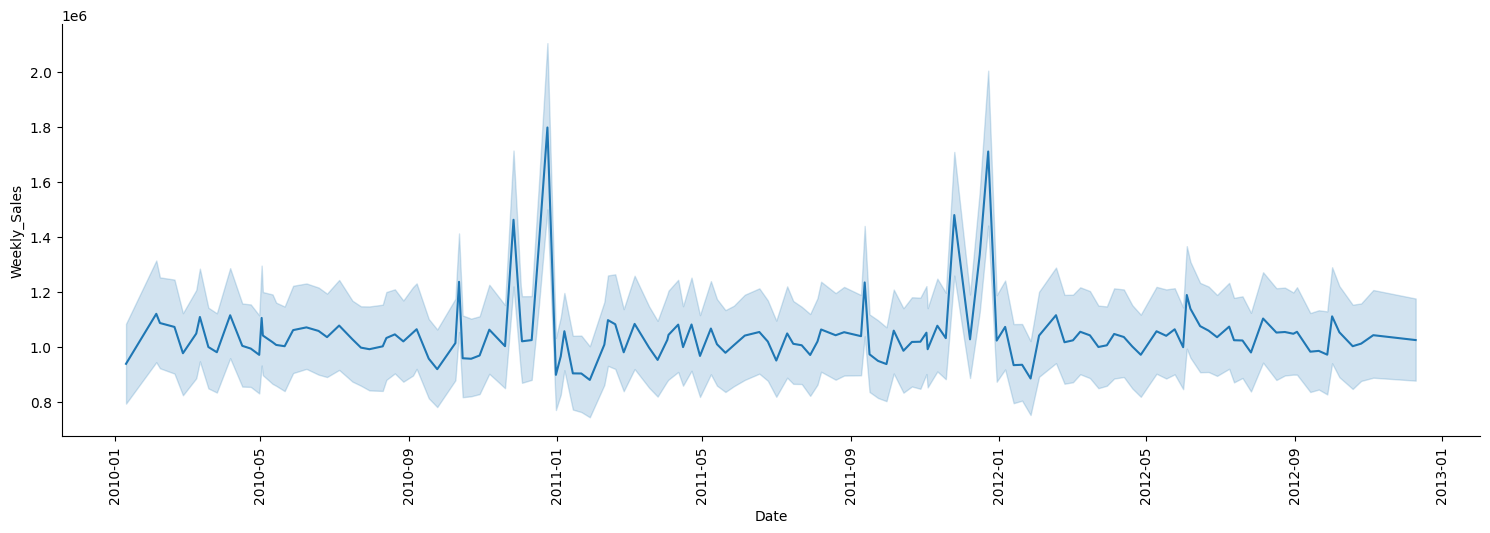

In [13]:
g = sns.relplot(data=retail_sales, x='Date', y='Weekly_Sales', kind='line', height=5, aspect=3)

ax = g.axes.flatten()[0]
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()

ax.set_xticklabels(xticklabels, rotation=90)
ax.set_xticks(xticks)
plt.show()

In [9]:
retail_sales['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [18]:
retail_sales['Store'].value_counts().sort_values(ascending=True)

1     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
2     143
21    143
23    143
44    143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
25    143
45    143
Name: Store, dtype: int64

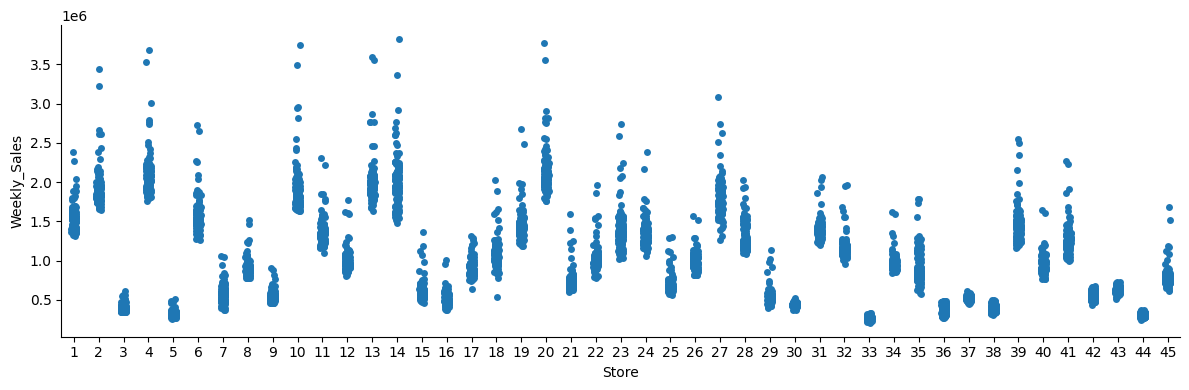

In [23]:
sns.catplot(data=retail_sales, x='Store', y='Weekly_Sales', height=4, aspect=3)

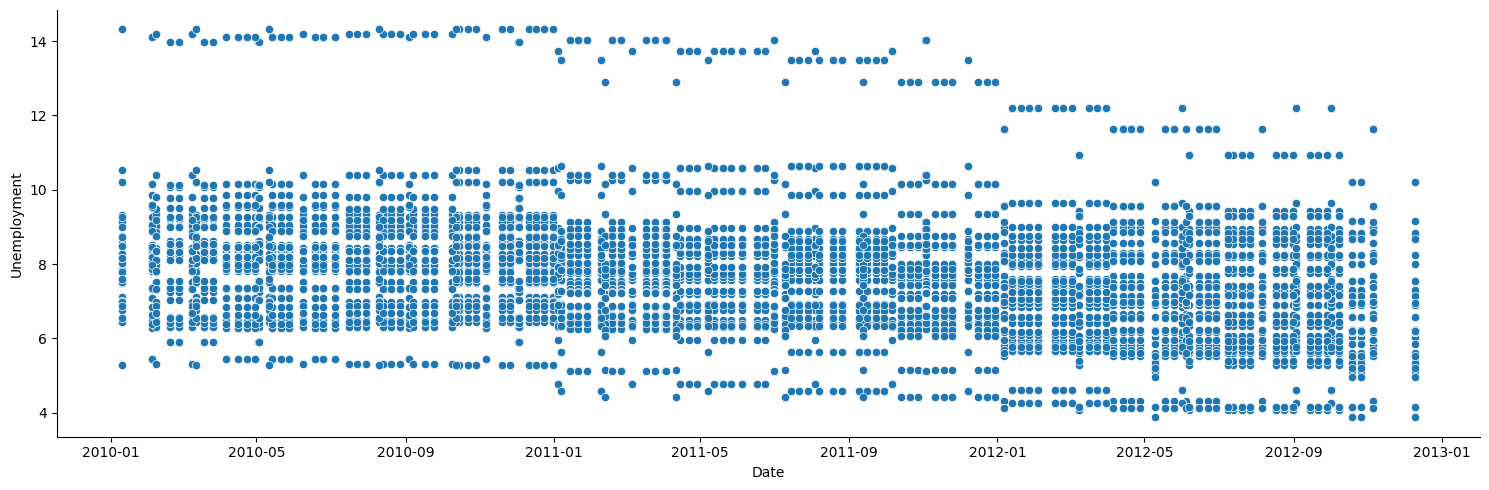